In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv
/kaggle/input/winequality-red-csv/winequality-red.csv


# ### Introduction

The **Red Wine Quality** dataset contains a collection of physicochemical properties of red wine and its sensory quality rating. This dataset, derived from the **Vinho Verde** wines in Portugal, provides valuable insights into the factors that influence the quality of red wine. The dataset includes 11 input variables related to the wine's chemical composition, such as acidity, alcohol content, sugar levels, and sulfur dioxide concentration. The output variable is a quality rating between 0 and 10, which represents the sensory quality of the wine as evaluated by human experts.

The task is to predict wine quality either as a continuous variable (regression) or by classifying wines into different categories, such as 'good' and 'bad'. Given that the dataset is imbalanced, with more wines rated as average or normal than those with higher quality, various techniques like resampling and model evaluation strategies will be used to create a robust predictive model. By analyzing this dataset, we aim to understand which physicochemical features are most strongly associated with high-quality wines, and how we can predict wine quality with the help of machine learning algorithms.

# Step 1: Load the Dataset

Load the dataset into a pandas DataFrame and display basic details.

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

# Load the dataset
file_path = "/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv"
df = pd.read_csv(file_path)

# Display basic information
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
df.head()


Dataset shape: (1599, 12)
Columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Step 2: Exploratory Data Analysis (EDA)




Explore key characteristics of the dataset.



2.1 Summary Statistics

In [3]:
# Summary statistics
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


2.2 Check for Missing Values

In [4]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


2.3 Distribution of Quality Scores

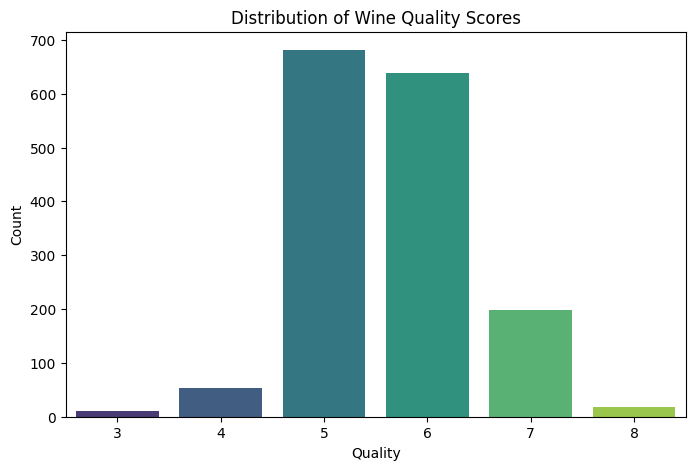

In [5]:
# Plot quality distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()


# Step 3: Data Preprocessing



3.1 Convert Quality to Binary Classification

Define wines with a quality score of 7 or higher as "good" (1) and others as "not good" (0).

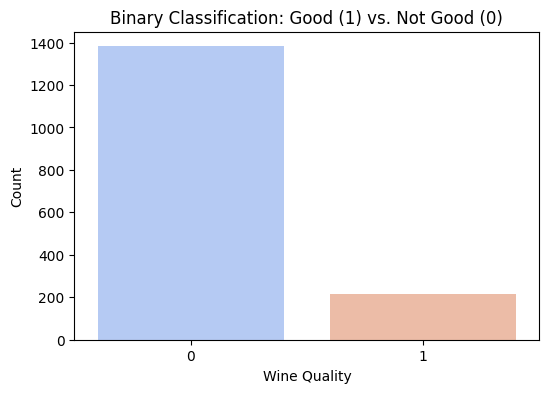

In [6]:
# Binary classification
df['quality_binary'] = (df['quality'] >= 7).astype(int)

# Check the distribution of the new variable
plt.figure(figsize=(6, 4))
sns.countplot(x="quality_binary", data=df, palette="coolwarm")
plt.title("Binary Classification: Good (1) vs. Not Good (0)")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()


3.2 Feature and Target Separation

In [7]:
# Separate features and target
X = df.drop(columns=["quality", "quality_binary"])
y = df["quality_binary"]


3.3 Train-Test Split

In [8]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


3.4 Feature Scaling

Standardize the features to improve model performance.

In [9]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 4: Decision Tree Classifier

4.1 Train the Model



In [10]:
# Train a decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

4.2 Evaluate the Model

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       346
           1       0.73      0.50      0.59        54

    accuracy                           0.91       400
   macro avg       0.83      0.74      0.77       400
weighted avg       0.90      0.91      0.90       400



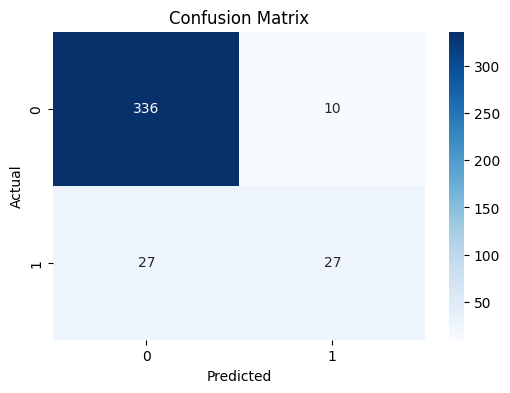

In [11]:
# Predict on test data
y_pred = dt_model.predict(X_test_scaled)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Step 5: ROC Curve and AUC

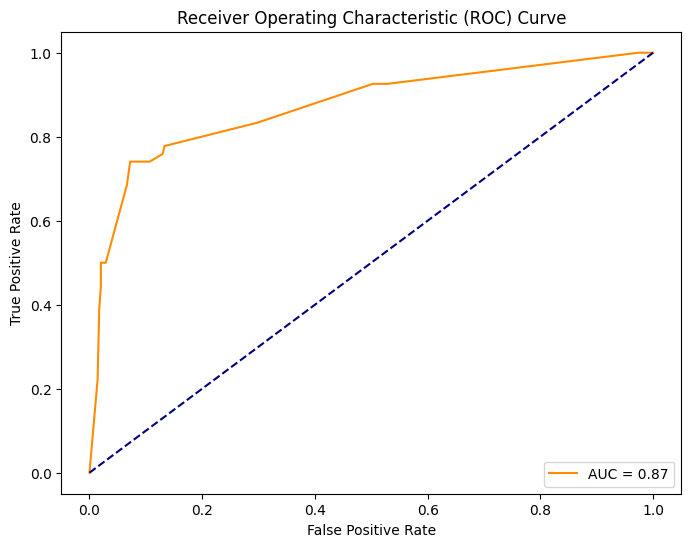

In [12]:
# Calculate probabilities for ROC
y_pred_prob = dt_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# Step 6: Insights and Conclusion
Insights:
Quality Distribution: Most wines are rated "normal," with fewer classified as excellent or poor. This imbalance is addressed by converting the problem into binary classification.
Key Features: Alcohol and volatile acidity show significant influence on wine quality based on exploratory scatter plots (can be added).
Model Performance: The decision tree achieved reasonable accuracy and an AUC score, showing its capability to distinguish between good and not-good wine.
.

# Conclusion

This analysis highlights the key physicochemical properties of red wine that impact quality. By using a simple decision tree model, we identified that features such as alcohol and acidity levels are critical. Further analysis, such as hyperparameter tuning or using ensemble methods, could improve model performance.
